Importando Bibliotecas e carregando Dados

In [42]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/sarviovalente/dataset_tomate/main/dataset_tomate.csv"

tomato_data = pd.read_csv(url,error_bad_lines=False)

Descrição dos Dados / Analise Inicial

In [43]:
tomato_data.describe()

,id,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,SR_d01,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,172.500000,0.780023,1.169990,0.674060,16462.800069,9.124822,0.754009,1.130988,0.699398,27444.185075,7.805515,0.728177,1.092219,0.660012,14519.771222,6.762840,0.719198,1.078754,0.657604,15001.133221,6.479522,0.689394
std,38.249183,95.588375,0.035999,0.053999,0.034849,1709.098541,1.433713,0.032205,0.048308,0.030261,3711.784699,1.076670,0.029086,0.043631,0.028366,2654.859976,0.909740,0.033993,0.050991,0.028864,2563.017213,1.153460,0.464505
min,1.000000,11.000000,0.649085,0.973586,0.556922,11005.355800,4.789961,0.635930,0.953869,0.592644,18122.404820,4.520550,0.642946,0.964381,0.552340,9431.856566,4.653617,0.655962,0.983908,0.582567,11463.913340,4.902359,0.000000
25%,33.750000,91.750000,0.772210,1.158270,0.669149,15640.851240,8.573545,0.744248,1.116344,0.695318,24887.192402,7.367286,0.710257,1.065336,0.650594,12726.575570,6.150417,0.694633,1.041907,0.642005,13312.951140,5.712593,0.000000
50%,66.500000,172.500000,0.788128,1.182145,0.680441,16762.631610,9.323441,0.761036,1.141527,0.705402,27679.685570,7.961278,0.731571,1.097308,0.665373,14091.257330,6.728679,0.712214,1.068278,0.651413,14295.935300,6.146371,1.000000
75%,99.250000,253.250000,0.803054,1.204534,0.694304,17570.790822,10.112440,0.773866,1.160773,0.714582,30054.630575,8.462474,0.746580,1.119825,0.676848,15864.872955,7.312529,0.728163,1.092204,0.671040,15673.598085,6.559074,1.000000
max,132.000000,334.000000,0.827867,1.241756,0.719607,19574.211170,11.798039,0.803978,1.205944,0.738357,36639.936610,9.869641,0.790565,1.185812,0.716056,23387.232530,8.930666,0.816574,1.224826,0.728204,23276.959950,10.377763,1.000000


Analise de HeatMap para descobrir quais atributos se relacionam mais com a Classe, exclusão de atributos ID e TRAT pois não importam para o objetivo desse projeto.

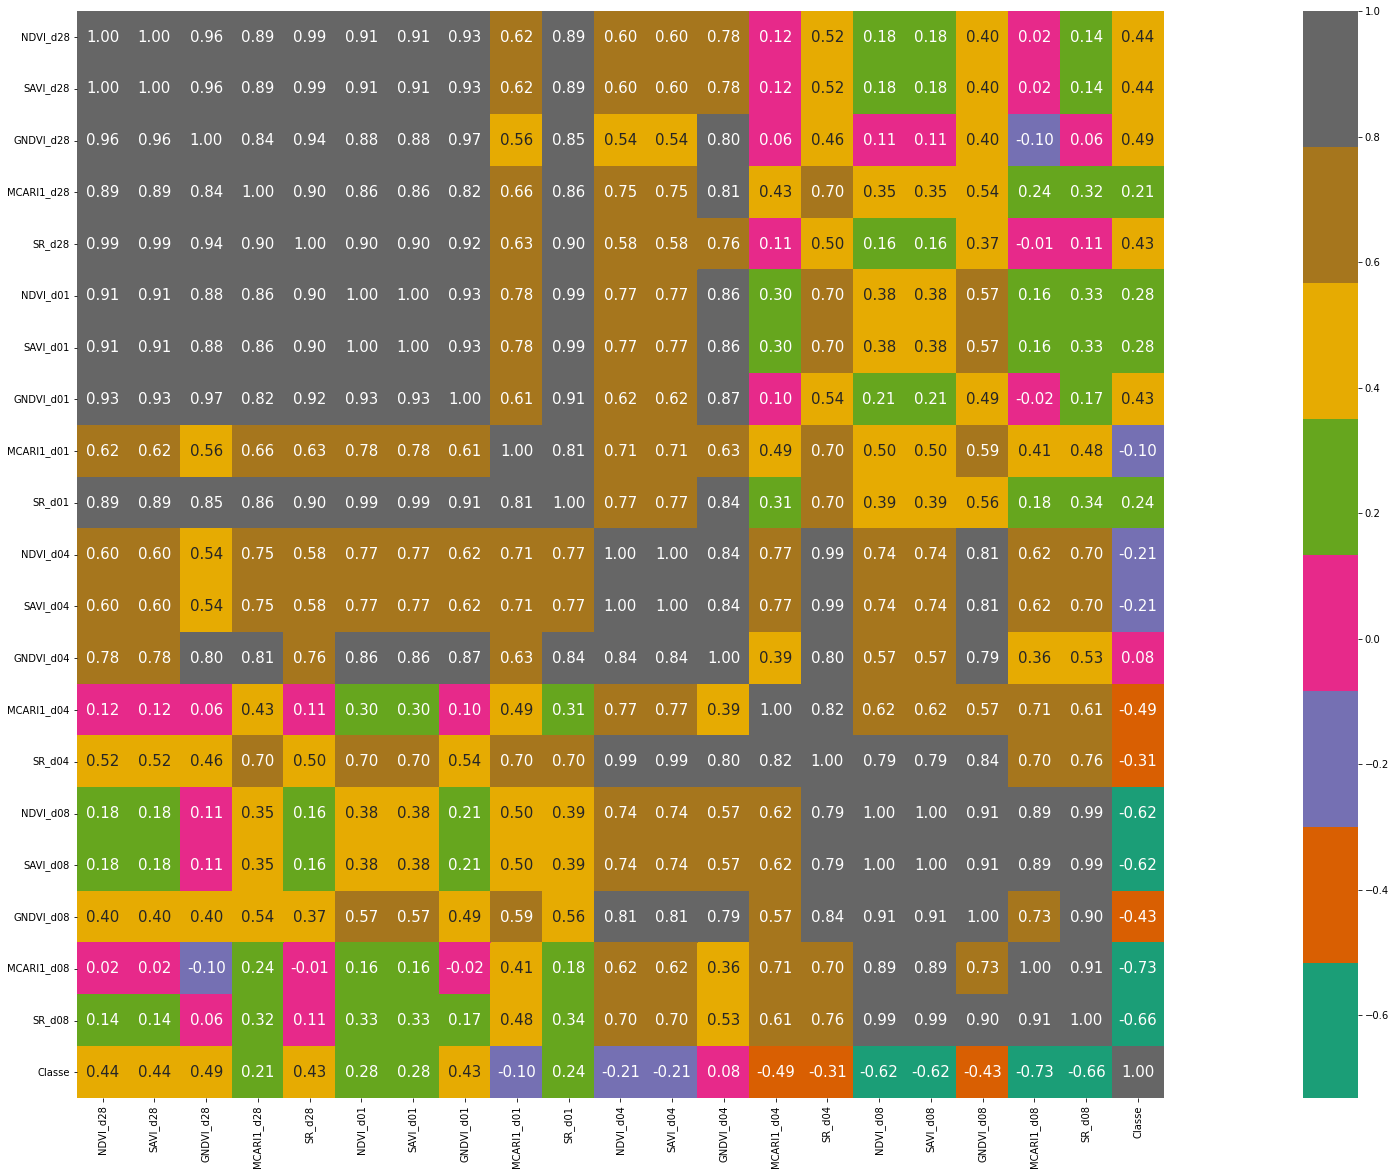

In [23]:
cols = ['NDVI_d28', 'SAVI_d28','GNDVI_d28','MCARI1_d28', 'SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
               'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08','Classe']
corr_matx = tomato_data[cols].corr()

plt.figure(figsize=(50,20))
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

Divisão das Entradas e Classes e normalisação dos valores para que o Algoritimo não de mais importancia para 1 dos atributos

In [61]:
entradas = tomato_data[['NDVI_d28', 'SAVI_d28','GNDVI_d28','MCARI1_d28', 'SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
               'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08']]

classes = tomato_data['Classe']

entradas=(entradas-entradas.min())/(entradas.max()-entradas.min())

Dividindo os valores entre Teste e Treino/ 20% teste 80% treino

In [62]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

Criação do Modelo de Machine Learning de Classificação

In [63]:
# Importa a biblioteca
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Cria o classificar KNN
modelo = QuadraticDiscriminantAnalysis()

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Realizando a predição e verificando precisão do algoritimo usando accuracy_score

In [64]:
classes_encontradas = modelo.predict(entradas_teste)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  1.0


Gerando um Grafico para exibição dos resultados, foram escolhidos os atributos MCARI1_d08 e GNDVI_d28 pois após testes eles se mostraram ideais para o Scatterplot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


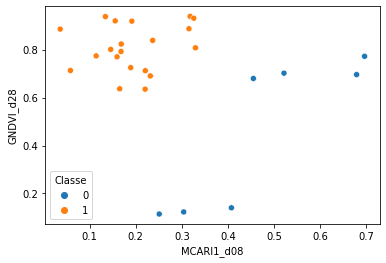

In [65]:
resultado = entradas_teste
resultado['Classe'] = classes_encontradas

sns.scatterplot('MCARI1_d08', 'GNDVI_d28', hue='Classe', data=resultado)

plt.show()

# Justificativas:

1. O processamento dos dados foi feito removendo dados inuteis como Id e Trat pois ambos são identificadores de cada objeto/linha, realizando o HeatMap para descoberta dos atributos mais importantes para o classificador e normalizando os valores para que o Algoritimo não de preferencia para alguns atributos.

2. Não há atributos categoricos nesse DataSet, apenas valores numericos.

3. Foi escolhido um Algoritimo de Classificação QDA QuadraticDiscriminantAnalysis, porque esse metodo é amplamente usado para descoberta de classificadores, se mostrou efetivo em diversos testes academicos pesquisados e é um modelo diferente dos explorados em aula.

4. A metrica adotada para avaliar a performance do Modelo foi o accuracy_score, pois nós temos o Classificador de cada linha e portanto podemos utilizalo para descobrir se o classificador atribuido pelo Modelo está correto.